<a href="https://colab.research.google.com/github/avanirawal/OIBSIP/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AVANI RAWAL

# TASK - 1
# PROJECT NAME - IRIS FLOWER CLASSIFICATION



In [ ]:
from IPython.display import Image
Image(url='https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png', width=850)

# Problem Statement
Iris flower has 3 species: Setosa, Versicolor and Virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

INPUT:
Sepal Length
Sepal width
Petal length
Petal width

OUTPUT:
Class of Flower

In [2]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import libraries for classification task
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score




In [4]:
#Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load Dataset

df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# check for missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [ ]:
# check for duplicates in the data
df.duplicated().sum()

0

In [ ]:
# remove id column
df.drop('Id', axis = 1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Descriptive Summary
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


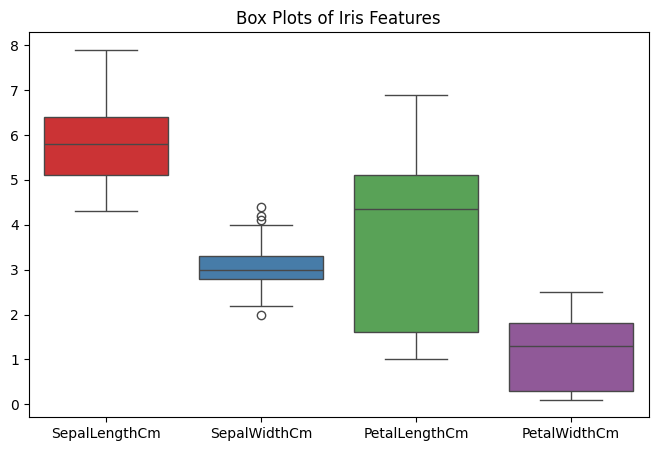

In [ ]:
# box plots for each numerical feature
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, orient='v', palette='Set1')
plt.title('Box Plots of Iris Features')
plt.show()

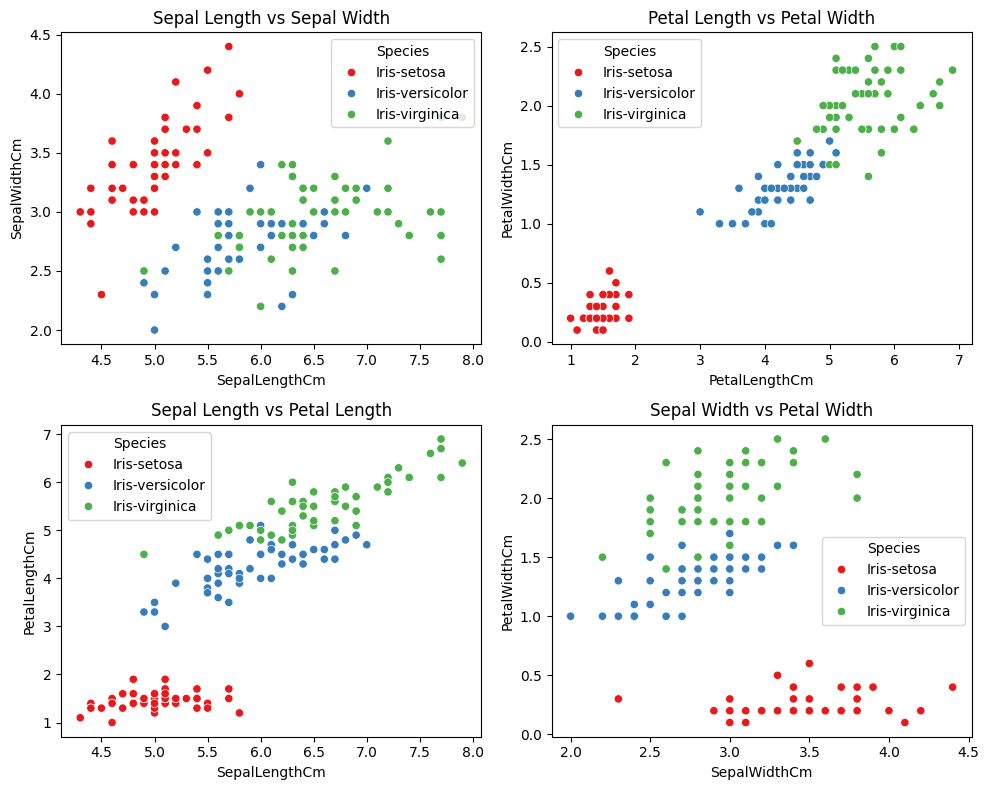

In [ ]:
# Create scatter plots for selected pairs of features
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='Set1')
plt.title('Sepal Length vs Sepal Width')

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette='Set1')
plt.title('Petal Length vs Petal Width')

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='SepalLengthCm', y='PetalLengthCm', hue='Species', palette='Set1')
plt.title('Sepal Length vs Petal Length')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='SepalWidthCm', y='PetalWidthCm', hue='Species', palette='Set1')
plt.title('Sepal Width vs Petal Width')

plt.tight_layout()
plt.show()

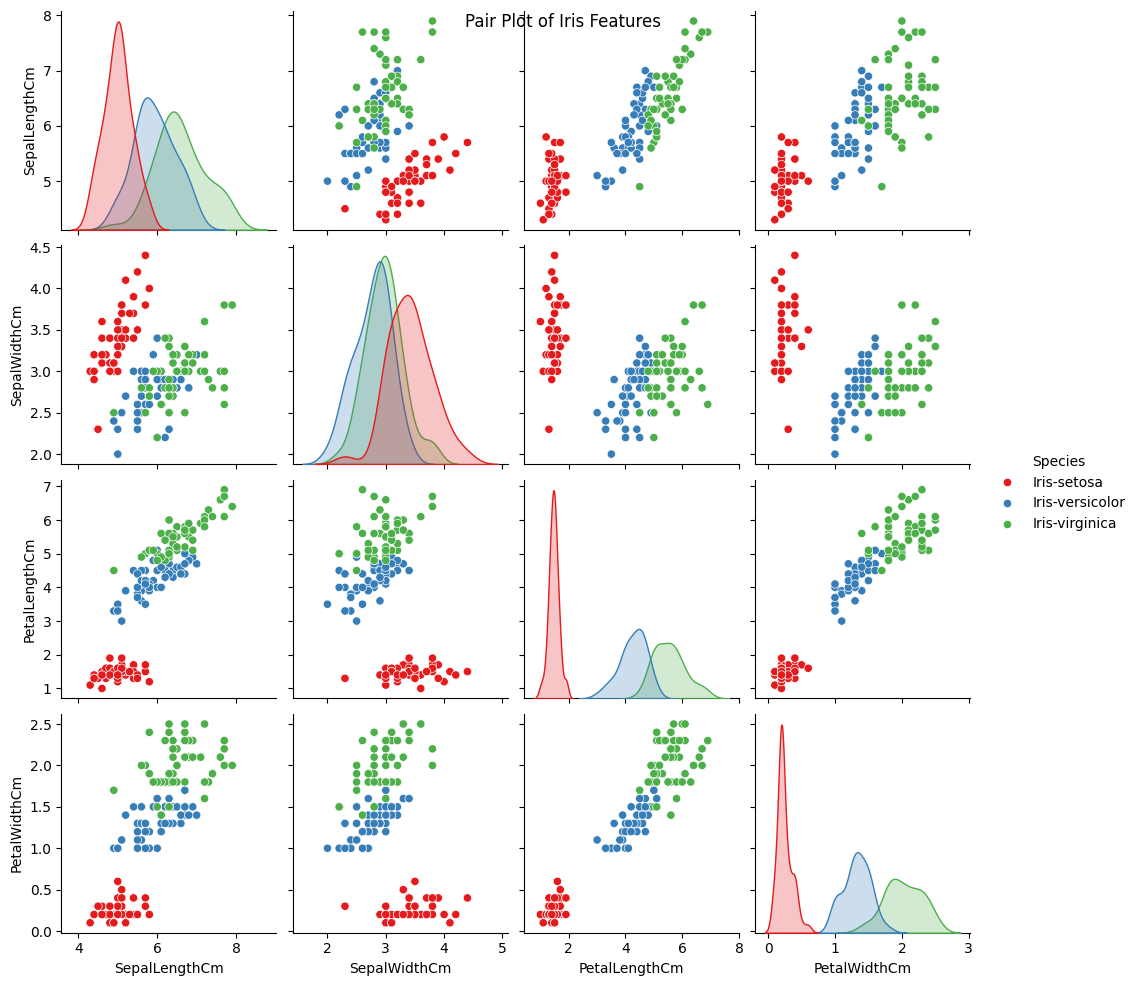

In [ ]:
# Pair plots provide a grid of scatter plots for each pair of numerical features along with histograms for individual features.
sns.pairplot(df, hue='Species', palette='Set1', markers=["o", "o", "o"])
plt.suptitle('Pair Plot of Iris Features')
plt.show()

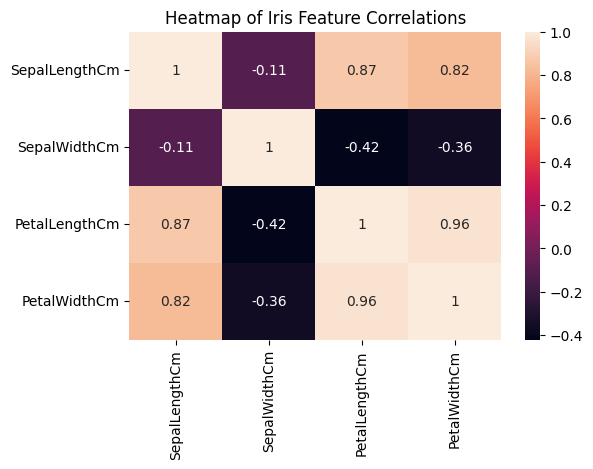

In [ ]:
# heatmap for correlation matrix
numerical_features = df.drop(columns='Species')
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True)

# Add title
plt.title('Heatmap of Iris Feature Correlations')
plt.show()

In [ ]:
# extract independent and dependent variables
X = df.drop(columns='Species')
y = df['Species']

# train test split
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# print the shapes
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (120, 4)
X_test:  (30, 4)
y_train:  (120,)
y_test:  (30,)


In [ ]:
# converting categorical variables into numbers
flower_mapping = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df['Species']=df['Species'].map(flower_mapping)
df.head()
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
# preparing inputs and outputs
X=df [['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y= df[['Species']].values

In [ ]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X,y)


LogisticRegression()

In [ ]:
# accuracy
model.score(X,y)


0.9733333333333334

In [ ]:
# make prediction for all 150 species in dataset
expected = y
predicted = model.predict(X)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# summarize the fit of the model
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [ ]:
# confusion metrics
print(metrics.confusion_matrix(expected, predicted))


[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [ ]:
from sklearn.svm import SVC

model_svc=SVC()
model_svc.fit(X_train,y_train)


SVC()

In [ ]:
prediction1 = model_svc.predict(X_test)

In [ ]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction1))


0.9333333333333333


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, y_train)


prediction3= model_svc.predict(X_test)


In [ ]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction3))


0.9333333333333333


In [ ]:
# New data for prediction
X_new = np.array([[3, 2, 1, 0.2], [4.9, 2.2, 3.8, 1.1], [5.3, 2.5, 4.6, 1.9]])


In [ ]:
# Predicting the sizes of the iris flowers
predicted_sizes = model.predict(X_new)

In [ ]:
# Output the predicted sizes
print(predicted_sizes)


[0 1 2]
